In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer

In [4]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.tools as tools
import plotly.express as px

In [5]:
from bokeh.io import output_file, show, output_notebook, push_notebook
from bokeh.plotting import figure 
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from bokeh.models import ColumnarDataSource, HoverTool, CategoricalColorMapper
output_notebook()

Loading BokehJS ...

In [6]:
os.getcwd()

'C:\\Users\\Owner'

In [7]:
os.chdir('C://Users//Owner/Desktop')

In [8]:
df = pd.read_csv('german_credit_data_with_risk(1).csv')

In [9]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [10]:
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [11]:
df.shape

(1000, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [13]:
df.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

In [14]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [15]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


In [16]:
df.describe(include = [np.object, pd.Categorical]).T

,count,unique,top,freq
Sex,1000,2,male,690
Housing,1000,3,own,713
Saving accounts,817,4,little,603
Checking account,606,3,little,274
Purpose,1000,8,car,337
Risk,1000,2,good,700


In [17]:
df.corr()

,Unnamed: 0,Age,Job,Credit amount,Duration
Unnamed: 0,1.000000,-0.010096,-0.027345,0.013488,0.030788
Age,-0.010096,1.000000,0.015673,0.032716,-0.036136
Job,-0.027345,0.015673,1.000000,0.285385,0.210910
Credit amount,0.013488,0.032716,0.285385,1.000000,0.624984
Duration,0.030788,-0.036136,0.210910,0.624984,1.000000


In [18]:
df.sample(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
780,780,25,male,2,own,little,moderate,4933,39,radio/TV,bad
420,420,20,female,2,rent,rich,NaN,3186,15,car,good
17,17,25,male,2,own,NaN,little,8072,30,business,good
687,687,30,male,2,free,moderate,moderate,2862,36,car,good
825,825,30,male,2,own,little,little,1602,21,car,good


In [19]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [20]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

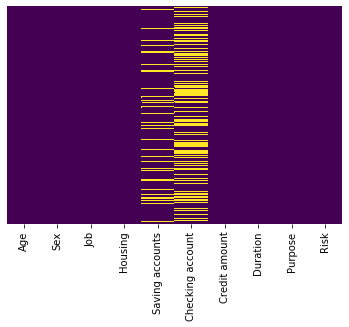

In [21]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap = 'viridis')

In [22]:
pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)],
         axis=1).rename(columns={0: 'Missing Amount', 1: 'Percentage (%)'})

,Missing Amount,Percentage (%)
Age,0,0.0
Sex,0,0.0
Job,0,0.0
Housing,0,0.0
Saving accounts,183,18.3
Checking account,394,39.4
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0
Risk,0,0.0


In [23]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

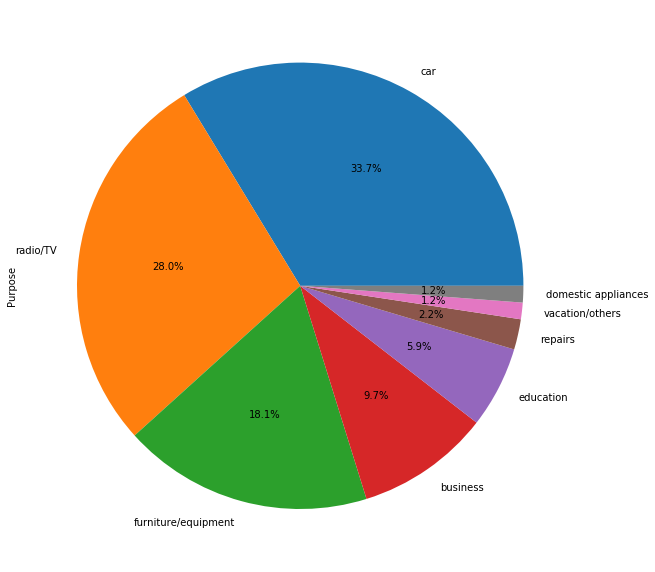

In [24]:
fig = plt.figure(figsize = (10, 14))
df['Purpose'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

In [25]:
df['Checking account'].value_counts(dropna = False)

NaN         394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [26]:
df['Saving accounts'].value_counts(dropna = False)

little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

## Analysis of the target variable

* Target variable is imbalanced

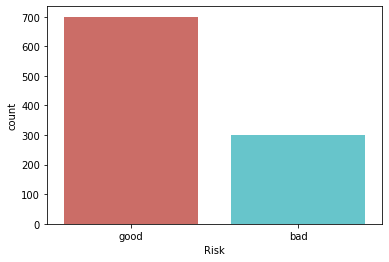

In [27]:
sns.countplot(x = 'Risk', data = df, palette = 'hls')
plt.show()

In [28]:
df.groupby('Risk').size()

Risk
bad     300
good    700
dtype: int64

In [29]:
good_credit = df.loc[df['Risk'] == 'good']
good_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good


In [30]:
bad_credit = df.loc[df['Risk'] == 'bad']
bad_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
4,53,male,2,free,little,little,4870,24,car,bad
9,28,male,3,own,little,moderate,5234,30,car,bad
10,25,female,2,rent,little,moderate,1295,12,car,bad
11,24,female,2,rent,little,little,4308,48,business,bad


## Analysis of Age

* Jitter boxplot of age


* Histogram of ages


* Outliers of age

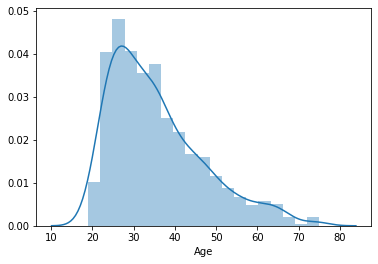

In [31]:
sns.distplot(df.Age)

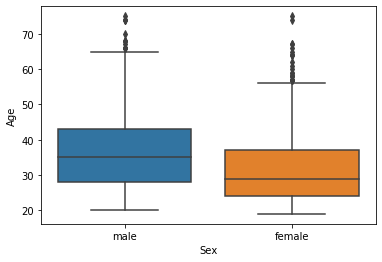

In [59]:
sns.boxplot(data = df, x = 'Sex', y = 'Age')

In [32]:
ages = [go.Histogram(x = df['Age'])]
age_layout = go.Layout(title = 'Histogram of Ages')
fig = go.Figure(data = ages, layout = age_layout)
pyo.plot(fig)

'temp-plot.html'

In [33]:
age = df.Age

In [34]:
age = list(age)

In [35]:
age_data = [go.Box(y=age, boxpoints='all', jitter = 0.3, pointpos = 2.0)]
pyo.plot(age_data)

'temp-plot.html'

In [36]:
outlier_age_data = [go.Box(y = age, boxpoints = 'outliers', jitter = 0.4, pointpos = 2.0)]
pyo.plot(outlier_age_data)

'temp-plot.html'

In [37]:
print(df.isnull().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


## Analysis of Credit

* Credit amount


* Duration

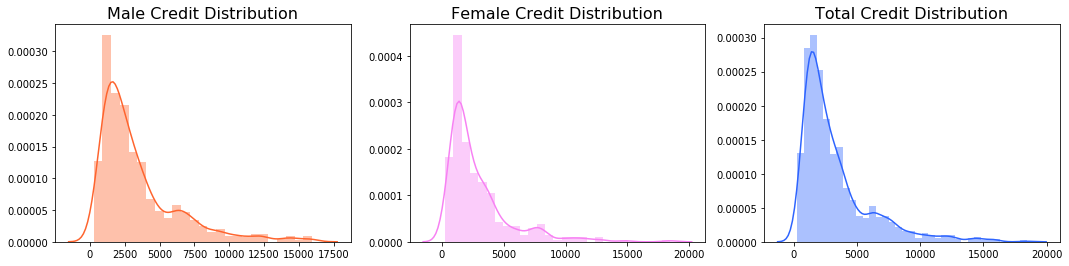

In [38]:
male_credit = df['Credit amount'].loc[df['Sex'] == 'male'].values
female_credit = df['Credit amount'].loc[df['Sex'] == 'female'].values
total_credit = df['Credit amount'].values

fig, ax = plt.subplots(1, 3, figsize = (18, 4))

sns.distplot(male_credit, ax = ax[0], color = '#FE642E')
ax[0].set_title('Male Credit Distribution', fontsize = 16)

sns.distplot(female_credit, ax = ax[1], color = '#F781F3')
ax[1].set_title('Female Credit Distribution', fontsize = 16)

sns.distplot(total_credit, ax = ax[2], color = '#2E64FE')
ax[2].set_title('Total Credit Distribution', fontsize = 16)

plt.show()

In [39]:
by_age = df['Age'].values.tolist()
male_age = df['Age'].loc[df['Sex'] == 'male'].values.tolist()
female_age = df['Age'].loc[df['Sex'] == 'female'].values.tolist()

trace0 = go.Histogram(
    x=male_age,
    histnorm='probability',
    name="German Male",
    marker = dict(
        color = 'rgba(100, 149, 237, 0.6)',
    )
)
trace1 = go.Histogram(
    x=female_age,
    histnorm='probability',
    name="German Female",
    marker = dict(
        color = 'rgba(255, 182, 193, 0.6)',
    )
)
trace2 = go.Histogram(
    x=by_age,
    histnorm='probability',
    name="Overall Gender",
     marker = dict(
        color = 'rgba(169, 169, 169, 0.6)',
    )
)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Males','Female', 'All Genders'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Distribution of Gender', bargap=0.05)
pyo.plot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\Owner\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

C:\Users\Owner\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `custom-sized-subplot-with-subplot-titles` didn't end with .html. Adding .html to the end of your file.



'custom-sized-subplot-with-subplot-titles.html'

## Analysis of Wealth 

* Difference between checking and savings accounts 


* Difference between purposes between men and women

In [40]:
sex_and_checking = pd.crosstab(df['Checking account'], df['Sex']).apply(lambda x: x/x.sum() * 100)
sex_and_checking

Sex,female,male
Checking account,,
little,45.360825,45.145631
moderate,44.329897,44.417476
rich,10.309278,10.436893


C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



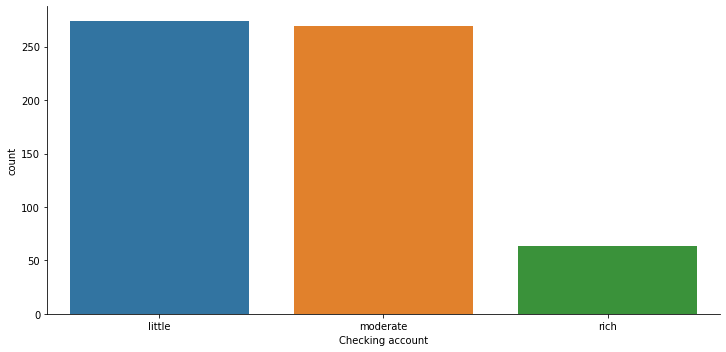

In [41]:
sns.factorplot('Checking account', data = df, kind = 'count', aspect = 2.0)

In [42]:
sex_and_savings = pd.crosstab(df['Saving accounts'], df['Sex']).apply(lambda x: x/x.sum() * 100)
sex_and_savings

Sex,female,male
Saving accounts,,
little,74.329502,73.561151
moderate,12.260536,12.769784
quite rich,6.130268,8.453237
rich,7.279693,5.215827


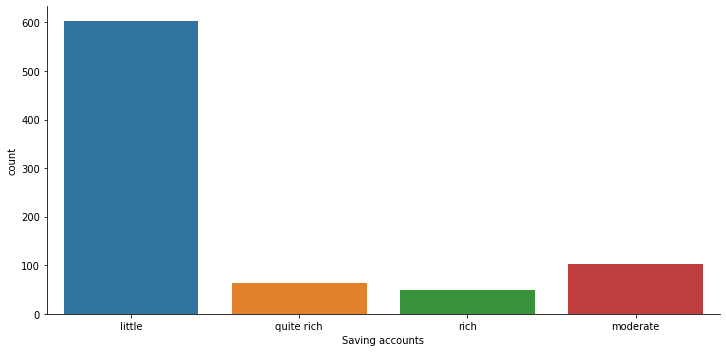

In [43]:
sns.factorplot('Saving accounts', data = df, kind = 'count', aspect = 2.0)

In [44]:
sex_and_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: x/x.sum() * 100)
sex_and_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


In [45]:
females = df[df['Sex'] == 'female']

In [46]:
females.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
10,25,female,2,rent,little,moderate,1295,12,car,bad
11,24,female,2,rent,little,little,4308,48,business,bad
12,22,female,2,own,little,moderate,1567,12,radio/TV,good
14,28,female,2,rent,little,little,1403,15,car,good


In [112]:
fem = ["Purpose", 'Risk']

cm = sns.light_palette("blue", as_cmap=True)

pd.crosstab(females[fem[0]], females[fem[1]]).style.background_gradient(cmap = cm)

Risk,bad,good
Purpose,,
business,7,12
car,40,54
domestic appliances,2,4
education,9,15
furniture/equipment,28,46
radio/TV,19,66
repairs,2,3
vacation/others,2,1


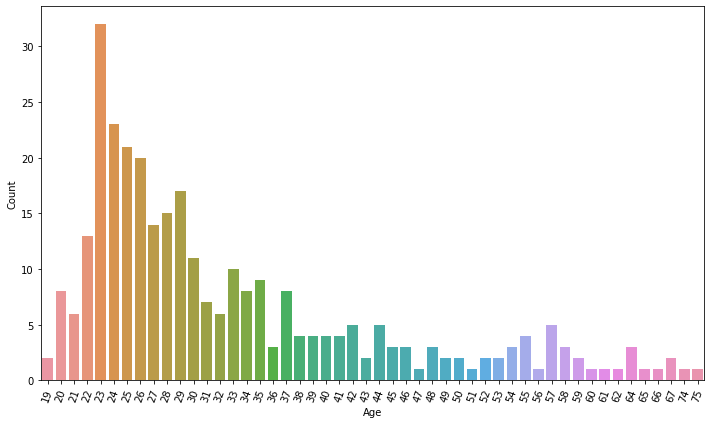

In [103]:
females_ages = females.groupby("Age")["Purpose"].count().rename("Count").reset_index()
females_ages.sort_values(by = ["Count"], ascending = False, inplace = True)

plt.figure(figsize = (10,6))

bar = sns.barplot(x = "Age", y = "Count", data = females_ages)
bar.set_xticklabels(bar.get_xticklabels(), rotation = 70)

plt.tight_layout()

In [47]:
females.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts      49
Checking account    116
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

##  Female savings accounts analysis

* We can see that very few 'rich' and 'quite rich' women by savings account spend their money on things such as cars, furniture, or repairs

In [49]:
females_saving_accounts_purpose = pd.crosstab(females['Purpose'], females['Saving accounts'])
females_saving_accounts_purpose

Saving accounts,little,moderate,quite rich,rich
Purpose,,,,
business,15,3,0,1
car,48,12,6,8
domestic appliances,2,1,0,0
education,13,2,1,1
furniture/equipment,54,3,5,5
radio/TV,57,9,4,4
repairs,3,1,0,0
vacation/others,2,1,0,0


In [99]:
print("Count of female values described by risk: ")
print(pd.crosstab(females.Purpose, females.Risk))

Count of female values described by risk: 
Risk                 bad  good
Purpose                       
business               7    12
car                   40    54
domestic appliances    2     4
education              9    15
furniture/equipment   28    46
radio/TV              19    66
repairs                2     3
vacation/others        2     1


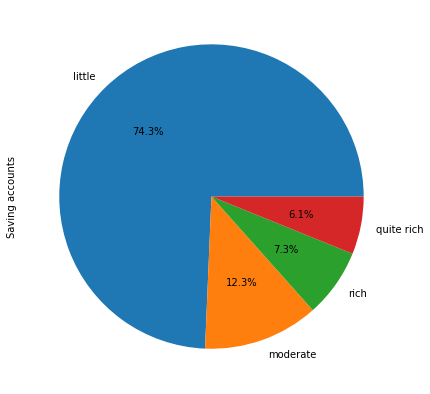

In [50]:
fig = plt.figure(figsize = (7, 7))
females['Saving accounts'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

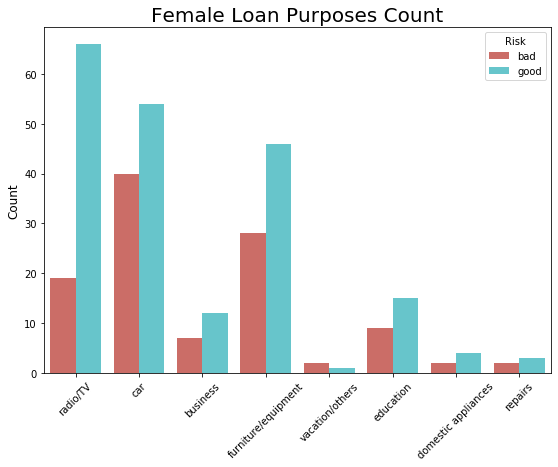

In [87]:
plt.figure(figsize = (20,14))

plt.subplot(221) 

a = sns.countplot(x = "Purpose", data = females, 
              palette="hls", hue = "Risk") 

a.set_xticklabels(g.get_xticklabels(),rotation=45)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Count", fontsize=12)
a.set_title("Female Loan Purposes Count", fontsize=20)

plt.show()

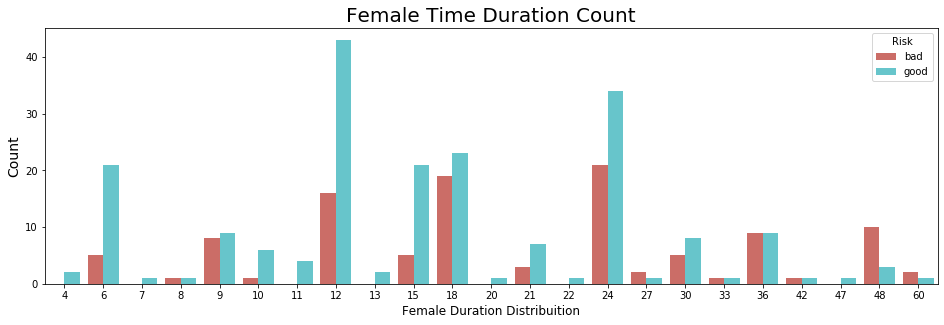

In [110]:
plt.figure(figsize = (16,16))

m = plt.subplot(311)
m = sns.countplot(x = "Duration", data = females, 
              palette="hls",  hue = "Risk")

m.set_xlabel("Female Duration Distribuition", fontsize = 12)
m.set_ylabel("Count", fontsize = 14)
m.set_title("Female Time Duration Count", fontsize = 20)

plt.show()

In [51]:
males = df[df['Sex'] == 'male']

In [52]:
males.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good


In [53]:
males.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     134
Checking account    278
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [113]:
men = ["Purpose", 'Risk']

cm = sns.light_palette("red", as_cmap=True)

pd.crosstab(males[men[0]], males[men[1]]).style.background_gradient(cmap = cm)

Risk,bad,good
Purpose,,
business,27,51
car,66,177
domestic appliances,2,4
education,14,21
furniture/equipment,30,77
radio/TV,43,152
repairs,6,11
vacation/others,3,6


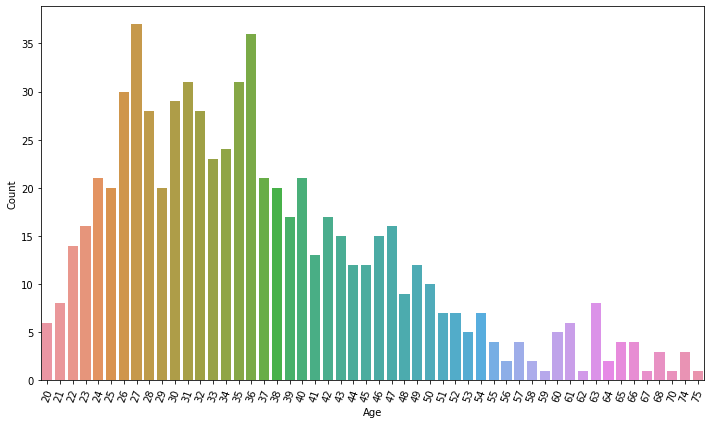

In [105]:
males_ages = males.groupby("Age")["Purpose"].count().rename("Count").reset_index()
males_ages.sort_values(by = ["Count"], ascending = False, inplace = True)

plt.figure(figsize = (10,6))

bar = sns.barplot(x = "Age", y = "Count", data = males_ages)
bar.set_xticklabels(bar.get_xticklabels(), rotation = 70)

plt.tight_layout()

## Males saving account analysis

* By analysis we can see that an overwhelming majority of men with little or moderate money in their savings accounts lean towards loans for cars

In [54]:
males_saving_accounts_purpose = pd.crosstab(males['Purpose'], males['Saving accounts'])
males_saving_accounts_purpose

Saving accounts,little,moderate,quite rich,rich
Purpose,,,,
business,41,14,4,5
car,140,27,12,10
domestic appliances,4,0,2,0
education,21,3,2,1
furniture/equipment,74,6,7,6
radio/TV,112,18,19,5
repairs,11,2,1,2
vacation/others,6,1,0,0


In [98]:
print("Count of male values described by risk: ")
print(pd.crosstab(males.Purpose, males.Risk))

Count of male values described by risk: 
Risk                 bad  good
Purpose                       
business              27    51
car                   66   177
domestic appliances    2     4
education             14    21
furniture/equipment   30    77
radio/TV              43   152
repairs                6    11
vacation/others        3     6


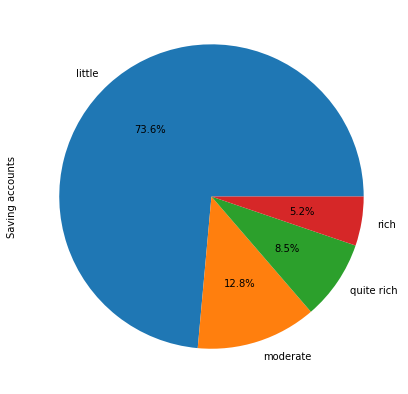

In [55]:
fig = plt.figure(figsize = (7, 7))
males['Saving accounts'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

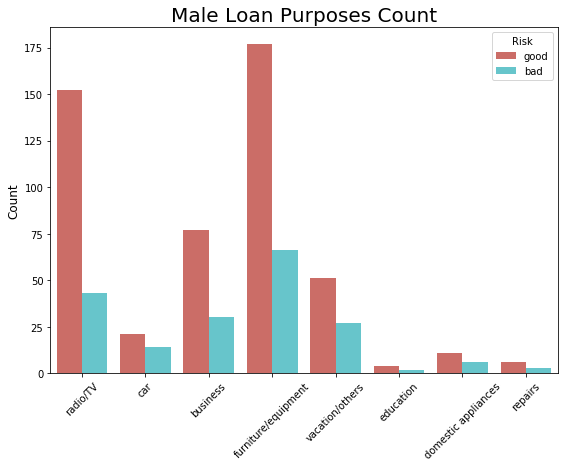

In [86]:
plt.figure(figsize = (20,14))

plt.subplot(221) 

a = sns.countplot(x = "Purpose", data = males, 
              palette="hls", hue = "Risk") 

a.set_xticklabels(g.get_xticklabels(),rotation=45)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Count", fontsize=12)
a.set_title("Male Loan Purposes Count", fontsize=20)

plt.show()

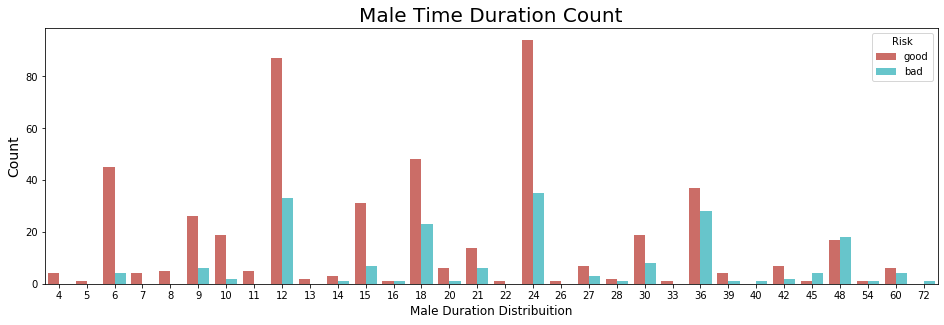

In [109]:
plt.figure(figsize = (16,16))

m = plt.subplot(311)
m = sns.countplot(x = "Duration", data = males, 
              palette="hls",  hue = "Risk")

m.set_xlabel("Male Duration Distribuition", fontsize = 12)
m.set_ylabel("Count", fontsize = 14)
m.set_title("Male Time Duration Count", fontsize = 20)

plt.show()